## Tensorflow and keras

No hay que tomar esto muy en serio, porque es medio "introductorio". Así que el código de abajo no está hecho de la manera en que comúnmente se haría y puede causar confusiones.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
# Keras function for loading images
from tensorflow.keras.preprocessing.image import load_img

In [3]:
# para colab
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 36.67 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [18]:
path = '/content/clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))

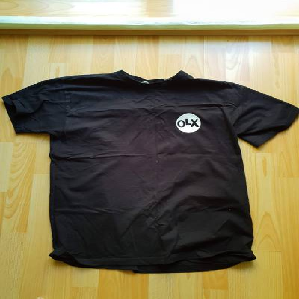

In [19]:
img

In [20]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7D1D455CC150>


array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]], dtype=uint8)
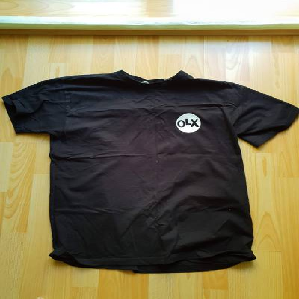

In [21]:
x = np.array(img)
x

In [22]:
x.shape

(299, 299, 3)

## Pre-trained convultional nn

In [23]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [24]:
# `weights = "imagenet"` means we want to use pre-trained network that was trained on imagenet

model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3)
)

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [25]:
# esto es igual que expandir dimensiones
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [26]:
# Esto es como el dividir por 255, es para normalizar los datos, una función que viene con keras y xception, pero pues como tal no divide en 255, hace otro tipo de normalización creo que de -1 a 1
X = preprocess_input(X)
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [27]:
pred = model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


(1, 1000)

In [28]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', 0.68196356),
  ('n02916936', 'bulletproof_vest', 0.038139995),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354207),
  ('n04525038', 'velvet', 0.0018453562)]]

Al parecer, ImageNet no es bueno en clothes detection, igual era un ejemplo muy muy básico

## Transfer Learning

Acá si comienza el "código"

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Si no tuviera el preprocess_input (se usa este porque estamos usando xception, y es el preprocesador que usa xception) una opción puede ser usar el escalador normal, por ejemplo, train_gen = ImageDataGenerator(rescale=1./255), claramente si tengo una función personalizada se puede usar.

# también es posible añadir augmentación como rotación, tamaños, etc.
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    '/content/clothing-dataset-small/train',
    target_size=(150,150),
    batch_size=32,
)

Found 3068 images belonging to 10 classes.


In [30]:
# Es necesario usar next(), normalmente no tiene los valores directamente, hay que iterarlo, pero esto se hace para mirar o sacar datos, como tal para entrenar no, keras itera al entrenar.
next(train_ds)

(array([[[[ 0.3411765 ,  0.30196083,  0.254902  ],
          [ 0.36470592,  0.32549024,  0.27843142],
          [ 0.37254906,  0.33333337,  0.28627455],
          ...,
          [ 0.6313726 ,  0.62352943,  0.5921569 ],
          [ 0.6156863 ,  0.60784316,  0.5764706 ],
          [ 0.6156863 ,  0.60784316,  0.5764706 ]],
 
         [[ 0.32549024,  0.28627455,  0.23921573],
          [ 0.34901965,  0.30980396,  0.26274514],
          [ 0.35686278,  0.3176471 ,  0.27058828],
          ...,
          [ 0.6392157 ,  0.6313726 ,  0.6       ],
          [ 0.6313726 ,  0.62352943,  0.5921569 ],
          [ 0.62352943,  0.6156863 ,  0.58431375]],
 
         [[ 0.3176471 ,  0.27843142,  0.2313726 ],
          [ 0.34901965,  0.30980396,  0.26274514],
          [ 0.34901965,  0.30980396,  0.26274514],
          ...,
          [ 0.64705884,  0.6392157 ,  0.60784316],
          [ 0.6392157 ,  0.6313726 ,  0.6       ],
          [ 0.6313726 ,  0.62352943,  0.5921569 ]],
 
         ...,
 
         [[ 

In [31]:
# El indice que le asignó a las clases (subcarpetas)
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [32]:
X, y = next(train_ds)

In [33]:
X.shape

(32, 150, 150, 3)

In [34]:
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [35]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# flow_from_directory me carga imagenes directamente desde una estructura de directorios, el shuffle false se suele usar en validación o evaluación, al validar si necesito los datos ordenados.
val_ds = val_gen.flow_from_directory(
    '/content/clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [36]:
# El include_top, en false me excluye las capas densas finales
# esto es usado cuando quieres usar el modelo para tu propio problema específico con tus propias etiquetas, en términos, deja solo las capas convolucionales, conviertiendolo en un extractor de caracteristicas.
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# congela los pesos del modelo base, esto es para que cuando entrenemos no se vuelva a entrenar los pesos del modelo base, porque es un modelo ya entrenado, no es necesario entrenarlo otra vez
base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
# acá entre comillas ya está creando el modelo, solo que hacer así es como raro, cada capa se agrega a la otra por eso la estructura es "capa = capa(capa_anterior)"
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


(32, 10)

In [38]:
preds[0]

array([ 0.8062713 ,  0.5841359 , -0.10669273, -0.06270878, -0.0714315 ,
        0.58588576,  0.08007611,  0.87710106,  0.31663358,  0.39007354],
      dtype=float32)

In [39]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# El logits en true se usa cuando no tenemos una función de activación (none o linear) en un problema de clasificación, entonces hay que normalizar los logits, al parecer es más preciso y robusto hacerlo con logits en lugar de activarlo con alguna función de activación de clasificación (softmax o sigmoide).
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [40]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 210ms/step - accuracy: 0.5898 - loss: 1.6265 - val_accuracy: 0.8065 - val_loss: 0.7050
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8290 - loss: 0.5167 - val_accuracy: 0.8006 - val_loss: 0.8029
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.8924 - loss: 0.3128 - val_accuracy: 0.7713 - val_loss: 0.9816
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9138 - loss: 0.2477 - val_accuracy: 0.7742 - val_loss: 0.9905
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9201 - loss: 0.2294 - val_accuracy: 0.7977 - val_loss: 0.8942
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9563 - loss: 0.1210 - val_accuracy: 0.8065 - val_loss: 1.0065
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9663 - loss: 0.1077 - val_accuracy: 0.7801 - val_loss: 1.1233
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9798 - loss: 0.0630 - val_accuracy: 0.8211 - val_los

In [41]:
history.history['accuracy']
# history.history['val_accuracy']

[0.6756845116615295,
 0.8269230723381042,
 0.8751629590988159,
 0.9188396334648132,
 0.9237288236618042,
 0.9507822394371033,
 0.9674054980278015,
 0.9810951948165894,
 0.9921773076057434,
 0.991525411605835]

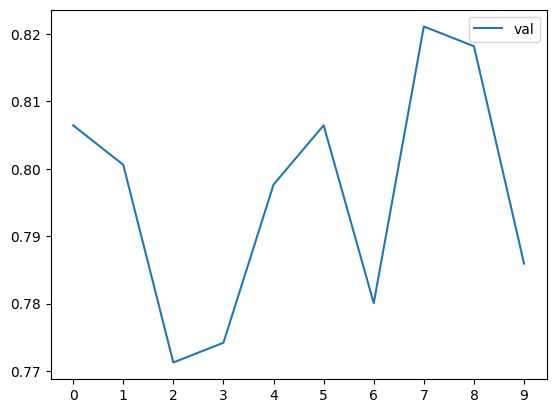

In [42]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate

In [43]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    #################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    v = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(v)
    model = keras.Model(inputs, outputs)

    #################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [44]:
scores = {}

for lr in [0.001, 0.01]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = model.history

    print()
    print()

0.001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 128ms/step - accuracy: 0.5233 - loss: 1.4151 - val_accuracy: 0.7566 - val_loss: 0.7434
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.7920 - loss: 0.6164 - val_accuracy: 0.8182 - val_loss: 0.6029
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8460 - loss: 0.4996 - val_accuracy: 0.8182 - val_loss: 0.5793
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.8680 - loss: 0.4337 - val_accuracy: 0.8299 - val_loss: 0.5457
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8956 - loss: 0.3487 - val_accuracy: 0.8358 - val_loss: 0.5324
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9187 - loss: 0.3173 - val_accuracy: 0.8299 - val_loss: 0.5319
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9271 - loss: 0.2771 - val_accuracy: 0.8270 - val_loss: 0.5344
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9382 - loss: 0.2467 - val_accuracy: 0

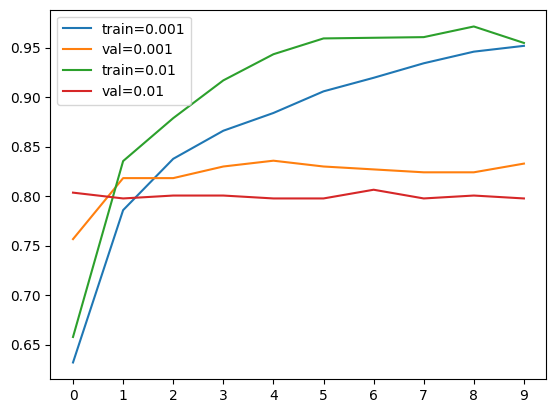

In [45]:
for lr, hist in scores.items():
    plt.plot(hist.history['accuracy'], label=('train=%s' % lr))
    plt.plot(hist.history['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

## Training a model with callbacks

In [46]:
# solo me guarda los pesos
model.save_weights('model_v1.weights.h5')

In [49]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    # max porque accuracy funciona con valor máximo, en caso de ser pérdida/loss usarias el valor min.
    mode='max'
)

In [50]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.4928 - loss: 1.5046 - val_accuracy: 0.7654 - val_loss: 0.7022
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.7749 - loss: 0.6709 - val_accuracy: 0.8152 - val_loss: 0.6198
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8316 - loss: 0.5116 - val_accuracy: 0.8065 - val_loss: 0.5651
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.8589 - loss: 0.4290 - val_accuracy: 0.8152 - val_loss: 0.5633
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8737 - loss: 0.3963 - val_accuracy: 0.8270 - val_loss: 0.5233
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.9074 - loss: 0.3199 - val_accuracy: 0.8240 - val_loss: 0.5246
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9236 - loss: 0.2882 - val_accuracy: 0.8240 - val_loss: 0.5333
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.9378 - loss: 0.2519 - val_accuracy: 0.8182 

## Adding more layers

In [51]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [52]:
learning_rate = 0.001
scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 142ms/step - accuracy: 0.3538 - loss: 1.7659 - val_accuracy: 0.5924 - val_loss: 1.2418
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.6360 - loss: 1.1484 - val_accuracy: 0.6979 - val_loss: 0.9875
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.7106 - loss: 0.9166 - val_accuracy: 0.7742 - val_loss: 0.7898
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.7862 - loss: 0.6871 - val_accuracy: 0.7742 - val_loss: 0.7118
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8047 - loss: 0.5812 - val_accuracy: 0.7771 - val_loss: 0.6789
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8451 - loss: 0.4947 - val_accuracy: 0.8035 - val_loss: 0.6492
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8565 - loss: 0.4486 - val_accuracy: 0.7947 - val_loss: 0.6174
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.8883 - loss: 0.3921 - val_accuracy: 0.79

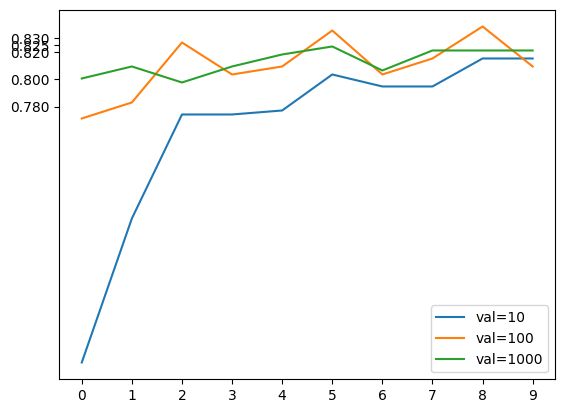

In [53]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()